In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import sklearn as sk
import matplotlib
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

/Users/Future/Library/Python/3.6/lib/python/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Figure 6/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
train = sc.read('../data/pancreas.h5ad')
train.obs["cell_type"] = train.obs["celltype"].tolist()
train

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain', 'cell_type'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [5]:
top_cell_types = train.obs["cell_type"].value_counts().index.tolist()[:6]
top_cell_types.remove("not applicable")
top_cell_types

['alpha', 'beta', 'ductal', 'acinar', 'delta']

In [6]:
train.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    train.obs.loc[train.obs["celltype"] == cell_type, "cell_type"] = cell_type
train.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha'],
      dtype=object)

In [7]:
train.obs.groupby(['sample', 'celltype']).size()

sample       celltype              
Baron        acinar                     958
             activated_stellate         284
             alpha                     2326
             beta                      2525
             delta                      601
             ductal                    1077
             endothelial                252
             epsilon                     18
             gamma                      255
             macrophage                  55
             mast                        25
             quiescent_stellate         173
             schwann                     13
             t_cell                       7
Muraro       acinar                     219
             alpha                      812
             beta                       448
             delta                      193
             ductal                     245
             endothelial                 21
             epsilon                      3
             gamma                      

### Figure 6.a

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Figure 6/umap_batch.pdf


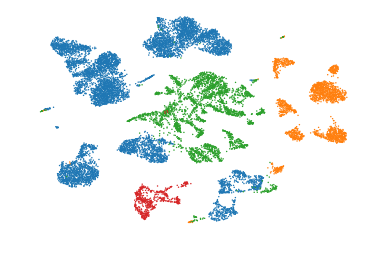

saving figure to file ../results/Figures/Figure 6/umap_celltype.pdf


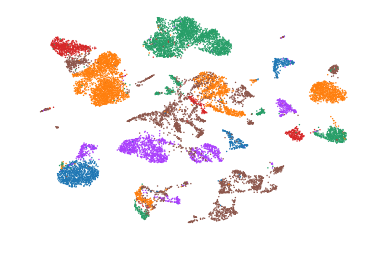

In [6]:
sc.tl.pca(train, svd_solver='arpack')
train.obsm["X_pca"] *= -1
sc.pp.neighbors(train)
sc.tl.umap(train)
sc.pl.umap(train, color=["sample"], title="", legend_loc=False, wspace=.5, show=True, save="_batch.pdf", frameon=False)
sc.pl.umap(train, color=["cell_type"], title="", legend_loc=False, wspace=.5, show=True, save="_celltype.pdf", frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_batch.pdf"), 
          dst=os.path.join(path_to_save, "Fig6a_umap_batch_original.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_celltype.pdf"), 
          dst=os.path.join(path_to_save, "Fig6a_umap_celltype_original.pdf"))

In [7]:
X_pca = train.obsm["X_pca"]
labels = train.obs["batch"].tolist()
print(f" average silhouette_score for original data : {sk.metrics.silhouette_score(X_pca, labels)}")

 average silhouette_score for original data : 0.21305909752845764


In [29]:
%%bash
python3 ../code/pancreas.py

acinar
alpha
beta
delta
ductal
endothelial
epsilon
gamma
mast
scGen batch corrected pancreas has been saved in ../data/reconstructed/scGen/pancreas.h5ad


2019-04-09 23:49:34.552557: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
... storing 'cell_type' as categorical
... storing 'study' as categorical
... storing 'celltype' as categorical


In [8]:
pancreas_batched = sc.read('../data/reconstructed/scGen/pancreas.h5ad')
pancreas_batched.obs["cell_type"] = train.obs["celltype"].tolist()
pancreas_batched

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'cell_type', 'study', 'celltype'

In [10]:
pancreas_batched.obs.groupby(['study', 'celltype']).size()

study        celltype
Baron        acinar       958
             alpha       2326
             beta        2525
             delta        601
             ductal      1077
             gamma        255
             others       827
Muraro       acinar       219
             alpha        812
             beta         448
             delta        193
             ductal       245
             gamma        101
             others       108
Segerstolpe  acinar       185
             alpha        886
             beta         270
             delta        114
             ductal       386
             gamma        197
             others      1325
Wang         acinar         6
             alpha        190
             beta         111
             delta          9
             ductal        96
             gamma         18
             others       205
dtype: int64

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Figure 6/umap_pancreas_cell_batched.pdf


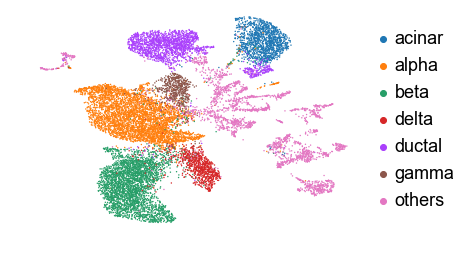

saving figure to file ../results/Figures/Figure 6/umap_study_pancreas_batched.pdf


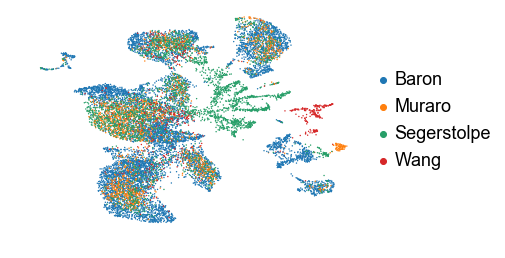

In [9]:
font = {'family' : 'Arial',
        'weight': 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
sc.tl.pca(pancreas_batched, svd_solver='arpack')
pancreas_batched.obsm["X_pca"] *= -1
sc.pp.neighbors(pancreas_batched)
sc.tl.umap(pancreas_batched)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["celltype"],
           save="_pancreas_cell_batched.pdf", frameon=False, show=True, legend_fontsize=18)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["study"],
           save="_study_pancreas_batched.pdf", frameon=False, show=True, legend_fontsize=18)
os.rename(src=os.path.join(path_to_save, "umap_pancreas_cell_batched.pdf"),
          dst=os.path.join(path_to_save, "Fig6b_umap_scgen_celltype.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_study_pancreas_batched.pdf"),
          dst=os.path.join(path_to_save, "Fig6b_umap_scgen_batch.pdf"))

In [10]:
X_pca = pancreas_batched.obsm["X_pca"]
labels = pancreas_batched.obs["study"].tolist()
print(f" average silhouette_score for scGen  :{sk.metrics.silhouette_score(X_pca, labels)}")

 average silhouette_score for scGen  :-0.0917782187461853
